In [57]:
from google.colab import drive
drive.mount("/content/gdrive")

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [58]:
import numpy as np

In [59]:
%cd /content/gdrive/MyDrive/TheCodingBug/yolov7/organized/text_folder

/content/gdrive/MyDrive/TheCodingBug/yolov7/organized/text_folder


In [60]:
H=np.array([[ 1.00573521e+01, -3.33475888e+00,  6.20128376e-02],
       [ 3.40240542e-02,  1.33613688e+01,  3.22180200e-02],
       [ 2.11447369e-03, -6.47405088e-01,  1.00000000e+00]])

In [71]:
import os
text_files_list = os.listdir("/content/gdrive/MyDrive/TheCodingBug/yolov7/organized/text_folder")

In [72]:
import cv2

def transform_point_with_homography(H, point):
    """
    Transforms a point using a homography matrix.

    Args:
        H (numpy.ndarray): The 3x3 homography matrix.
        point (tuple): The normalized point coordinates (x, y) ranging from 0 to 1.

    Returns:
        tuple: The transformed point coordinates (x, y).
    """
    # Convert the point to homogeneous coordinates
    point_homogeneous = np.array([point[0], point[1], 1.0]).reshape(3, 1)

    # Apply the homography transformation
    transformed_point = np.dot(H, point_homogeneous)

    # Normalize the coordinates
    transformed_point /= transformed_point[2]

    return (transformed_point[0, 0], transformed_point[1, 0])

def real_points(i):
  x= float(filtered_lines[i].split(" ")[1])
  y= 1-((float(filtered_lines[i].split(" ")[2]) + float(filtered_lines[i].split(" ")[4])/2))
  player_position_image = np.array((x, y), dtype=np.float32)

  player_position_image = np.array([[x, y]], dtype=np.float32)

  return player_position_image

In [73]:
# Specify the path to your text file
all_points=[]
for text in text_files_list:
  # Initialize an empty list to store the filtered lines
  filtered_lines = []

  # Open the text file for reading
  with open(text, "r") as file:
      # Read and process each line
      for line in file:
          # Check if the line starts with '0'
          if line.startswith('0'):
              # If it starts with '0', add it to the filtered lines
              filtered_lines.append(line)
    # Define the normalized point coordinates (e.g., (0.5, 0.5))
  normalized_points=[]
  for i in range(len(filtered_lines)):
    normalized_points.append(real_points(i)[0])
  transformed_points=[]
  for i in range(len(normalized_points)):
    transformed_points.append(transform_point_with_homography(H, normalized_points[i]))
  all_points.append(transformed_points)

KeyboardInterrupt: ignored

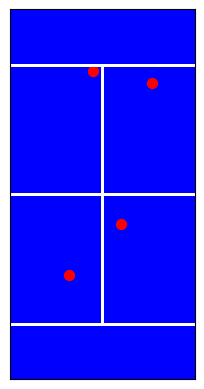

In [118]:
import cv2
import numpy as np

# Define video settings
output_video = cv2.VideoWriter('padel_points_video.mp4', cv2.VideoWriter_fourcc(*'mp4v'), 30, (800, 400))

# Define Padel court dimensions
court_length = 10.0  # meters
court_width = 20.0   # meters

# Create a list of points to animate
all_points = all_points  # Replace with your list of points for each frame

# Create a figure and axis
fig, ax = plt.subplots()

# Set the aspect ratio to be equal
ax.set_aspect('equal', adjustable='box')

# Set axis limits
ax.set_xlim(0, court_length)
ax.set_ylim(0, court_width)

# Hide axis labels and grid
ax.set_xticks([])
ax.set_yticks([])
ax.grid(False)

# Iterate through frames
for frame_points in all_points:
    # Create a blank image for each frame
    court_image = np.zeros((400, 800, 3), dtype=np.uint8)

    # Draw the court background and markings as before
    background = plt.Rectangle((0, 0), court_length, court_width, linewidth=0, edgecolor='none', facecolor='blue')
    ax.add_patch(background)
    net_y = court_width / 2
    plt.plot([0, court_length], [net_y, net_y], color='white', linewidth=2)
    plt.axhline(y=3, color='white', linewidth=2)
    plt.axhline(y=17, color='white', linewidth=2)
    plt.axvline(x=court_length / 2, ymin=3 / court_width, ymax=17 / court_width, color='white', linewidth=2)

    # Plot the points in red
    for point in frame_points:
        x, y = point
        plt.scatter(x, y, c='red', marker='o', s=50)

    # Render the figure and convert it to an OpenCV image
    fig.canvas.draw()
    img = np.array(fig.canvas.renderer.buffer_rgba())

    # Resize the image to fit the video dimensions
    img = cv2.resize(img, (800, 400))

    # Write the frame to the video
    output_video.write(img)

# Release the video writer
output_video.release()

# Close the Matplotlib figure
plt.close(fig)



In [65]:
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation


In [113]:
def update(frame):
    ax.clear()

    # Draw the court background and markings as before
    plt.plot([0, court_length], [net_y, net_y], color='white', linewidth=2)
    plt.axhline(y=3, color='white', linewidth=2)
    plt.axhline(y=17, color='white', linewidth=2)
    plt.axvline(x=court_length / 2, ymin=3 / court_width, ymax=17 / court_width, color='white', linewidth=2)

    # Get the set of 4 points for the current frame
    points = all_points[frame]

    # Plot the scatter points in red
    for point in points:
        x, y = point
        plt.scatter(x, y, c='red', marker='o', s=50)

    # Set axis limits, labels, and title
    ax.set_xlim(0, court_length)
    ax.set_ylim(0, court_width)
    plt.xlabel('Length (meters)')
    plt.ylabel('Width (meters)')
    plt.title(f'Padel Court - Frame {frame}')
    ax.grid(False)


In [116]:
cd /content/gdrive/MyDrive/TheCodingBug/

/content/gdrive/MyDrive/TheCodingBug


In [117]:
import cv2
import numpy as np

# Define video settings
output_video = cv2.VideoWriter('padel_video_.mp4', cv2.VideoWriter_fourcc(*'mp4v'), 30, (2000, 1000))

# Define Padel court dimensions (standard)
court_length = 20.0  # meters
court_width = 10.0   # meters

# Iterate through frames
for frame in range(len(all_points)):
    # Create a blank image (padel court background)
    court_image = np.zeros((1000, 2000, 3), dtype=np.uint8)

    # Draw court markings and net (standard Padel court dimensions)
    net_height = 88  # pixels (adjust as needed)
    net_top = (court_image.shape[0] - net_height) // 2
    net_bottom = net_top + net_height
    cv2.rectangle(court_image, (0, 0), (court_image.shape[1], court_image.shape[0]), (0, 128, 0), thickness=-1)  # Green background
    cv2.line(court_image, (0, net_top), (court_image.shape[1], net_top), (255, 255, 255), thickness=2)
    cv2.line(court_image, (0, net_bottom), (court_image.shape[1], net_bottom), (255, 255, 255), thickness=2)
    cv2.rectangle(court_image, (court_image.shape[1] // 2 - 2, net_top), (court_image.shape[1] // 2 + 2, net_bottom), (255, 255, 255), thickness=-1)

    # Get the set of 4 points for the current frame
    points = all_points[frame]

    # Plot the points as red circles on the image
    for point in points:
        x, y = point
        cv2.circle(court_image, (int(x), int(y)), radius=5, color=(0, 0, 255), thickness=-1)

    # Write the frame to the video
    output_video.write(court_image)

# Release the video writer
output_video.release()


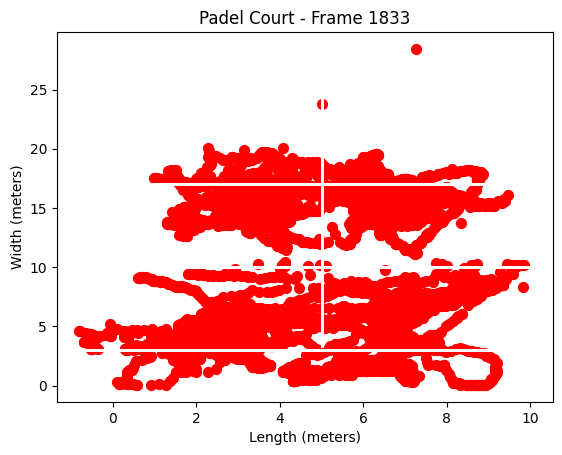

In [114]:
animation = FuncAnimation(fig, update, frames=len(all_points), repeat=False)
destination_folder = '/content/gdrive/MyDrive/Padel'
destination_file = 'padel_animation4.mp4'
destination_path = os.path.join(destination_folder, destination_file)
animation.save(destination_path, writer='ffmpeg', fps=30)



In [76]:
def create_heatmap(frames):
    # Initialize an empty court grid (matrix) to accumulate player positions
    court_grid = np.zeros((int(court_width), int(court_length)))

    for frame in frames:
        for point in frame:
            x, y = point
            # Convert coordinates to grid indices (assuming uniform grid)
            x_index = int(x * (court_length / court_width))
            y_index = int(y)

            # Increment the corresponding cell in the grid
            if 0 <= x_index < court_length and 0 <= y_index < court_width:
                court_grid[y_index, x_index] += 1  # You can adjust the increment value

    return court_grid


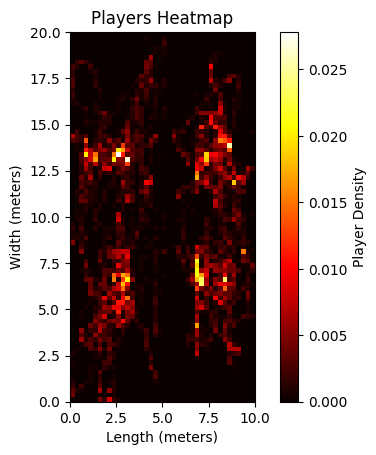

In [105]:
import numpy as np
import matplotlib.pyplot as plt

def create_heatmap(player_positions, court_length, court_width, resolution=(100, 100)):
    # Create an empty grid
    grid = np.zeros(resolution)

    # Determine the cell size
    cell_width = court_length / resolution[0]
    cell_height = court_width / resolution[1]

    # Iterate through frames
    for frame in player_positions:
        for x, y in frame:
            # Calculate grid indices for the player position
            grid_x = int(x / cell_width)
            grid_y = int(y / cell_height)

            # Ensure grid indices are within bounds
            grid_x = np.clip(grid_x, 0, resolution[0]-1)
            grid_y = np.clip(grid_y, 0, resolution[1]-1)

            # Increment the cell count
            grid[grid_x, grid_y] += 1

    # Normalize the data
    grid /= len(player_positions)

    return grid

# Define your player position data, court dimensions, and resolution
player_positions = all_points # Replace with your list of frames
court_length = 10.0  # meters
court_width = 20.0   # meters
resolution = (80, 40)

# Create the heatmap
heatmap = create_heatmap(player_positions, court_length, court_width, resolution)

# Plot the heatmap
plt.imshow(heatmap, cmap='hot', origin='lower', extent=[0, court_length, 0, court_width])
plt.colorbar(label='Player Density')  # Add a colorbar for reference
plt.xlabel('Length (meters)')
plt.ylabel('Width (meters)')
plt.title('Players Heatmap')

# Show the plot
plt.show()


In [102]:
# Filter out frames that are not empty and have at least one point
valid_frames = [frame for frame in all_points if len(frame) > 0]

# Extract the first point from each valid frame
points = [frame[0] for frame in valid_frames]


In [70]:
import os
import hashlib

def calculate_checksum(file_path, chunk_size=8192):
    """Calculate a checksum (hash) for a file."""
    hasher = hashlib.sha256()
    with open(file_path, "rb") as f:
        while True:
            data = f.read(chunk_size)
            if not data:
                break
            hasher.update(data)
    return hasher.hexdigest()

def remove_duplicate_files(folder_path):
    """Remove duplicate files from a folder based on content."""
    seen_checksums = set()
    for root, _, files in os.walk(folder_path):
        for file_name in files:
            file_path = os.path.join(root, file_name)
            checksum = calculate_checksum(file_path)
            if checksum in seen_checksums:
                # This file is a duplicate, so remove it
                os.remove(file_path)
            else:
                seen_checksums.add(checksum)

# Specify the folder path containing duplicate files
folder_path = '/content/gdrive/MyDrive/TheCodingBug/yolov7/organized/text_folder'
remove_duplicate_files(folder_path)
